# Chargement et traitement données OpenPose et Motion Capture

Les vidéos étant trop volumineuses, elles ne sont pas disponibles sur le github. Voici une capture d'écran de la vidéo après traitement OpenPose :

<div>
<img src="img\capture_ecran_openpose.png", width="480">
<div\>
    
On peut remarquer qu'une partie de la vidéo est floutée, le but était de cacher la deuxième personne présente sur la vidéo.

# ToDo
- (X) Retourner vidéo OpenPose
- (X) Synchronisation temporelle manuelle
- () Synchronisation temporelle automatique
- (X) Comparaison simple évolution des coordonnées (même si on sait que ce n'est pas le même repère)
- () Nouvelle acquisition en notant position de la caméra pour synchronisation spatiale
- () Tracer différence MoCap/tracking en fonction de la confiance c
- (X) Animer Mocap et Tracking
- () Projection 2D du mocap sur plan caméra et comparaison
- () Projection 3D tracking et comparaison
- () Remplacer les 0 tracking par anciennes positions
- () Etude du tracer du carré
- () Mettre capture d'écran et éventuellement lien vers la vidéo
- (X) Tracer vitesse et accélération des marqueurs
- () Rajouter couleur vitesse animation
- () Lissage des données
- () Tracer évolution de la confiance pour openpose
- (X) Régler problème enregistrement animation
- () Rajouter option seconde dans fonction de traçage pour avoir abscisses en seconde
- () Fonction pour les animations
- () Animation synchro 2D 
- () Animation synchro 3D

# Motion Capture
## Récupération des données

Le fichier csv nécessite une modification à la main avant d'être chagré. Voici les étapes à suivre :
* supprimer les 5 premières lignes
* supprimer la ligne mm et la colonne subframe
* remplir les cases au dessus de Y et Z avec le nom du marker

In [1]:
import pandas as pd
mocap_data = pd.read_csv("211019_NicoGabin_MoCapCarre-Copie.csv", sep=',', index_col=[0], header=[0,1]) 

In [95]:
mocap_data.head(10)

Nico1:epd1                   Nico1:epd2                   Nico1:bd2  \
Frame          X        Y        Z          X        Y        Z         X   
1        529.098  972.780  1507.33    144.311  787.576  1500.84   573.275   
2        527.486  974.043  1507.15    145.144  789.580  1500.57   567.770   
3        525.752  975.190  1506.97    145.791  790.930  1500.59   562.150   
4        523.852  974.707  1506.16    146.356  791.980  1500.72   556.158   
5        522.568  975.767  1506.22    146.834  792.955  1500.97   550.296   
6        521.538  977.016  1506.68    146.898  793.893  1501.86   545.998   
7        520.844  977.750  1507.58    147.198  794.805  1503.18   548.252   
8        520.437  978.141  1508.67    147.464  795.284  1504.07   551.129   
9        521.339  980.135  1510.21    147.503  795.223  1504.54   553.561   
10       521.652  979.015  1510.09    147.267  794.718  1504.61   557.130   

                        Nico1:abd2                   Nico1:abg1           \
Frame        Y        Z          X        Y        Z          X        Y   
1      1007.77  1178.54    352.540  1112.06  1023.32    97.5390  798.087   
2      1010.41  1178.02    338.958  1101.91  1026.39    99.7181  804.519   
3      1013.69  1177.82    325.751  1090.98  1029.93   102.0110  811.357   
4      1016.79  1177.62    314.334  1082.52  1034.94   104.1440  817.909   
5      1018.69  1177.28    306.045  1073.06  1039.36   106.8810  823.417   
6      1018.63  1177.55    308.810  1072.31  1041.79   108.9690  826.772   
7      1016.52  1178.19    311.420  1077.72  1042.37   110.0420  823.639   
8      1014.22  1179.31    314.051  1081.29  1043.31   109.6260  818.738   
9      1012.36  1180.17    316.406  1084.33  1041.63   108.6000  816.440   
10     1012.15  1180.98    320.281  1090.03  1040.92   107.3130  813.561   

               Nico1:abg2                    
Frame        Z          X        Y        Z  
1      1169.13        NaN      NaN      NaN  
2      1169.34    175.084  1025.27  1020.57  
3      1169.79    190.938  1030.28  1025.07  
4      1170.45    204.470  1033.86  1029.33  
5      1171.54    218.538  1036.40  1033.45  
6      1173.43    215.999  1037.19  1037.18  
7      1172.24    211.016  1039.43  1038.18  
8      1174.16    207.412  1038.12  1038.25  
9      1174.54    201.554  1039.04  1038.91  
10     1174.94    194.926  1039.74  1038.56

## Tracés de la position
### Un marqueur en 3D

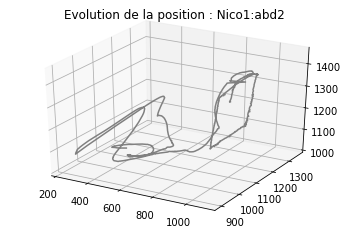

In [6]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt

def ev_3D_marker_mocap(data,seg,start=0,end=-1):
    "fonction qui trace en 3D l'évolution de la position du marqueur seg. start est la frame de départ et end la frame de fin"
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x=data.iloc[start:end][seg]['X'].tolist()
    y=data.iloc[start:end][seg]['Y'].tolist()
    z=data.iloc[start:end][seg]['Z'].tolist()

    ax.plot3D(x, y, z, 'gray')
    plt.title('Evolution de la position : '+seg)
    plt.show()
    
ev_3D_marker_mocap(mocap_data,'Nico1:abd2')

### Evolution des coordonnées
On peut afficher l'évolution des différentes coordonnées de chaque marqueur. Ceci est notamment utile pour repérer la frame à laquelle nous avons fait un clap.

<IPython.core.display.Javascript object>


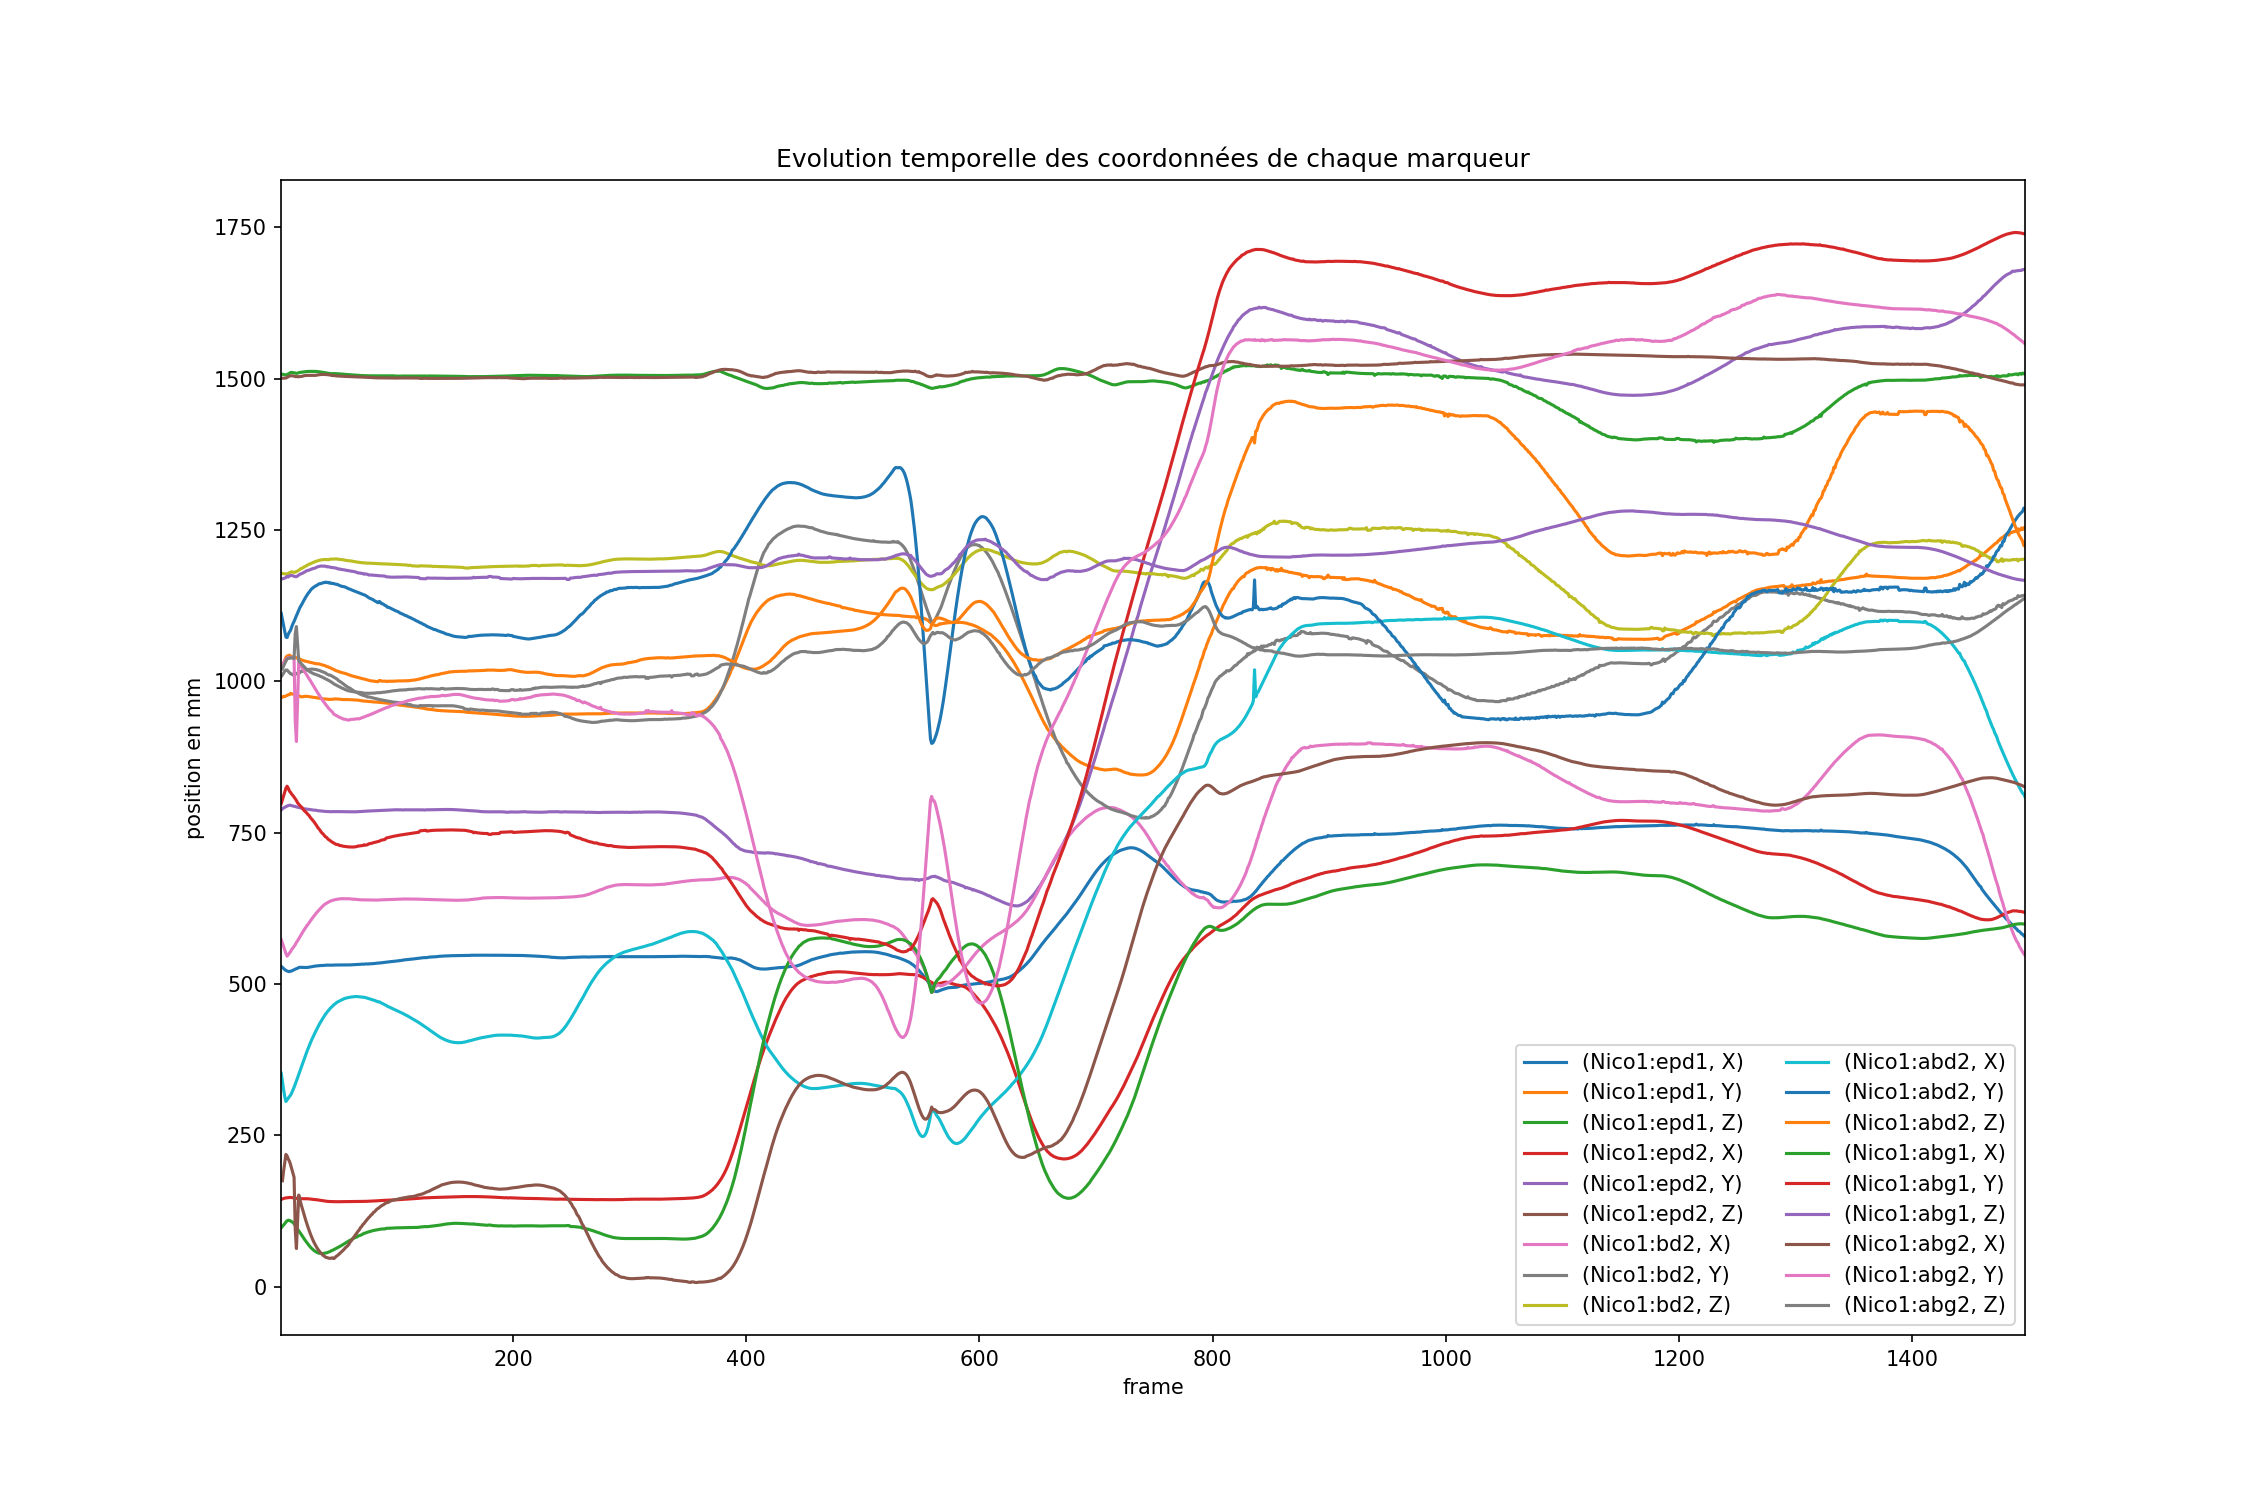

In [29]:
%matplotlib inline
def dataframe_plot(data,segments='all',start=0,end=-1,title='Evolution temporelle',xlabel='frame',ylabel=None):
    fig, ax = plt.subplots()
    if segments=='all':
        data.iloc[start:end].plot(figsize=(15,10),ax=ax)
    else :
        data.iloc[start:end].plot(y=segments,figsize=(15,10),ax=ax)
    ax.legend(ncol=2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    
dataframe_plot(mocap_data,ylabel='position en mm',title='Evolution temporelle des coordonnées de chaque marqueur')

### Animation 3D Motion Capture

Traceback (most recent call last):
  File "C:\Users\ReViVD\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 215, in process
    func(*args, **kwargs)
  File "C:\Users\ReViVD\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


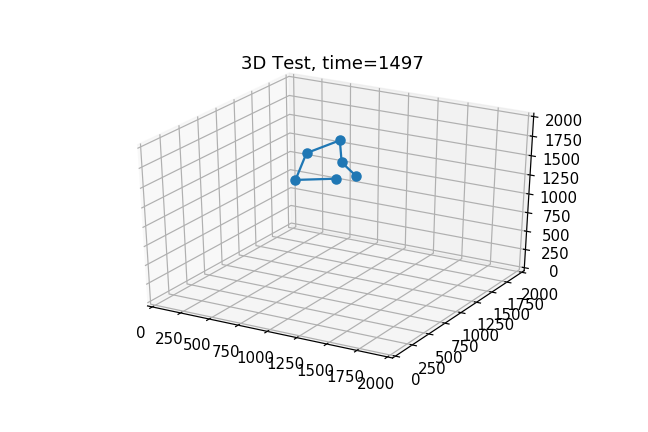

In [80]:
import numpy as np
import matplotlib
matplotlib.rcParams['animation.ffmpeg_path'] = r'ffmpeg.exe'
from mpl_toolkits.mplot3d import Axes3D
matplotlib.use("Agg")
import matplotlib.animation as animation
import pandas as pd
%matplotlib notebook
%matplotlib notebook

#segments=df.columns.get_level_values(level=0).unique()
segments=['Nico1:abd2','Nico1:bd2','Nico1:epd1','Nico1:epd2','Nico1:abg1','Nico1:abg2']

def update_graph(num):
    X,Y,Z=[],[],[]
    for seg in segments:
        data=mocap_data[seg].iloc[num]
        X.append(data.X)
        Y.append(data.Y)
        Z.append(data.Z)
    graph.set_data(X, Y)
    graph.set_3d_properties(Z)
    title.set_text('3D Test, time={}'.format(num))
    return title, graph, 


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('3D Test')
#ax.xlim=(df['Nico1:abd2']['X'].min(),df['Nico1:abd2']['X'].max())

X,Y,Z=[],[],[]
num=0
for seg in segments:
    data=mocap_data[seg].iloc[num]
    X.append(data.X)
    Y.append(data.Y)
    Z.append(data.Z)
graph, = ax.plot(X, Y, Z, linestyle="-", marker="o")

ani = animation.FuncAnimation(fig, update_graph, 
                               interval=10, blit=True, repeat=False,save_count=len(mocap_data)) #save_count=len(mocap_data) if you want to save all the animation

ax.set_xlim(0,2000)
ax.set_ylim(0,2000)
ax.set_zlim(0,2000)
Writer = animation.writers['ffmpeg']
writer = Writer(fps=100, metadata=dict(artist='Me'), bitrate=1800)
ani.save('videos/MoCap_animation.mp4', writer=writer)
plt.show()

## Evolution de la vitesse
### Série temporelle

In [87]:
import numpy as np
def derivee(df,fps):
    "renvoie un dataframe contenant la dérivée projetée sur x,y,z pour chaque segment"
    df2=(df.shift(1)-df)*fps
    df2=df2.fillna(0)
    return df2

def apply_norm(row,header):
    coord=row.index.get_level_values(1).unique()
    norm=0
    for c in coord:
        norm+=row[header][c]**2
    return(np.sqrt(norm))

def norm_dataframe(df):
    "renvoie un dataframe avec la norme des colonnes x,y,z."
    headers=df.columns.get_level_values(level=0).unique()
    df2=pd.DataFrame(columns=headers)
    for header in headers:
        df2[header]=df.apply(apply_norm,header=header,axis=1)
    return(df2)
    

mocap_coord_v=derivee(mocap_data,100)
mocap_v=norm_dataframe(mocap_coord_v)

Traceback (most recent call last):
  File "C:\Users\ReViVD\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 215, in process
    func(*args, **kwargs)
  File "C:\Users\ReViVD\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


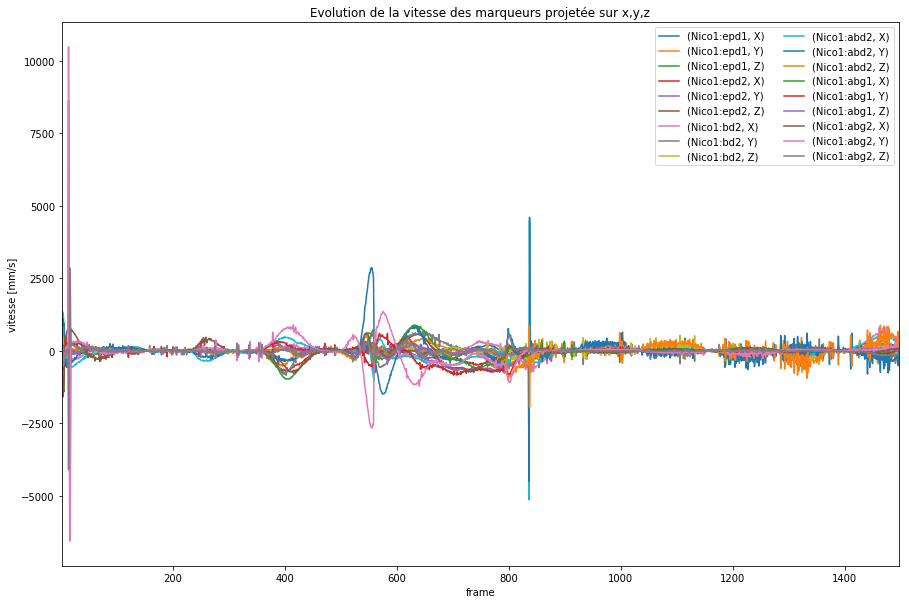

In [88]:
%matplotlib inline
dataframe_plot(mocap_coord_v,ylabel='vitesse [mm/s]',title='Evolution de la vitesse des marqueurs projetée sur x,y,z')

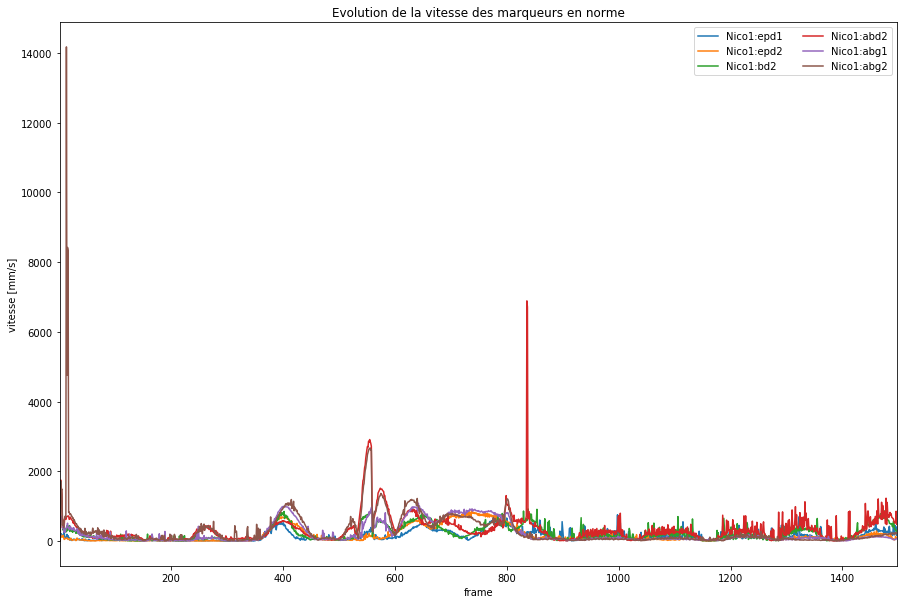

In [89]:
%matplotlib inline
dataframe_plot(mocap_v,ylabel='vitesse [mm/s]',title='Evolution de la vitesse des marqueurs en norme')

## Evolution de l'accélération

### Série temporelle

In [16]:
mocap_coord_acc=derivee(mocap_coord_v,100)
mocap_acc=norm_dataframe(mocap_coord_acc)

<IPython.core.display.Javascript object>


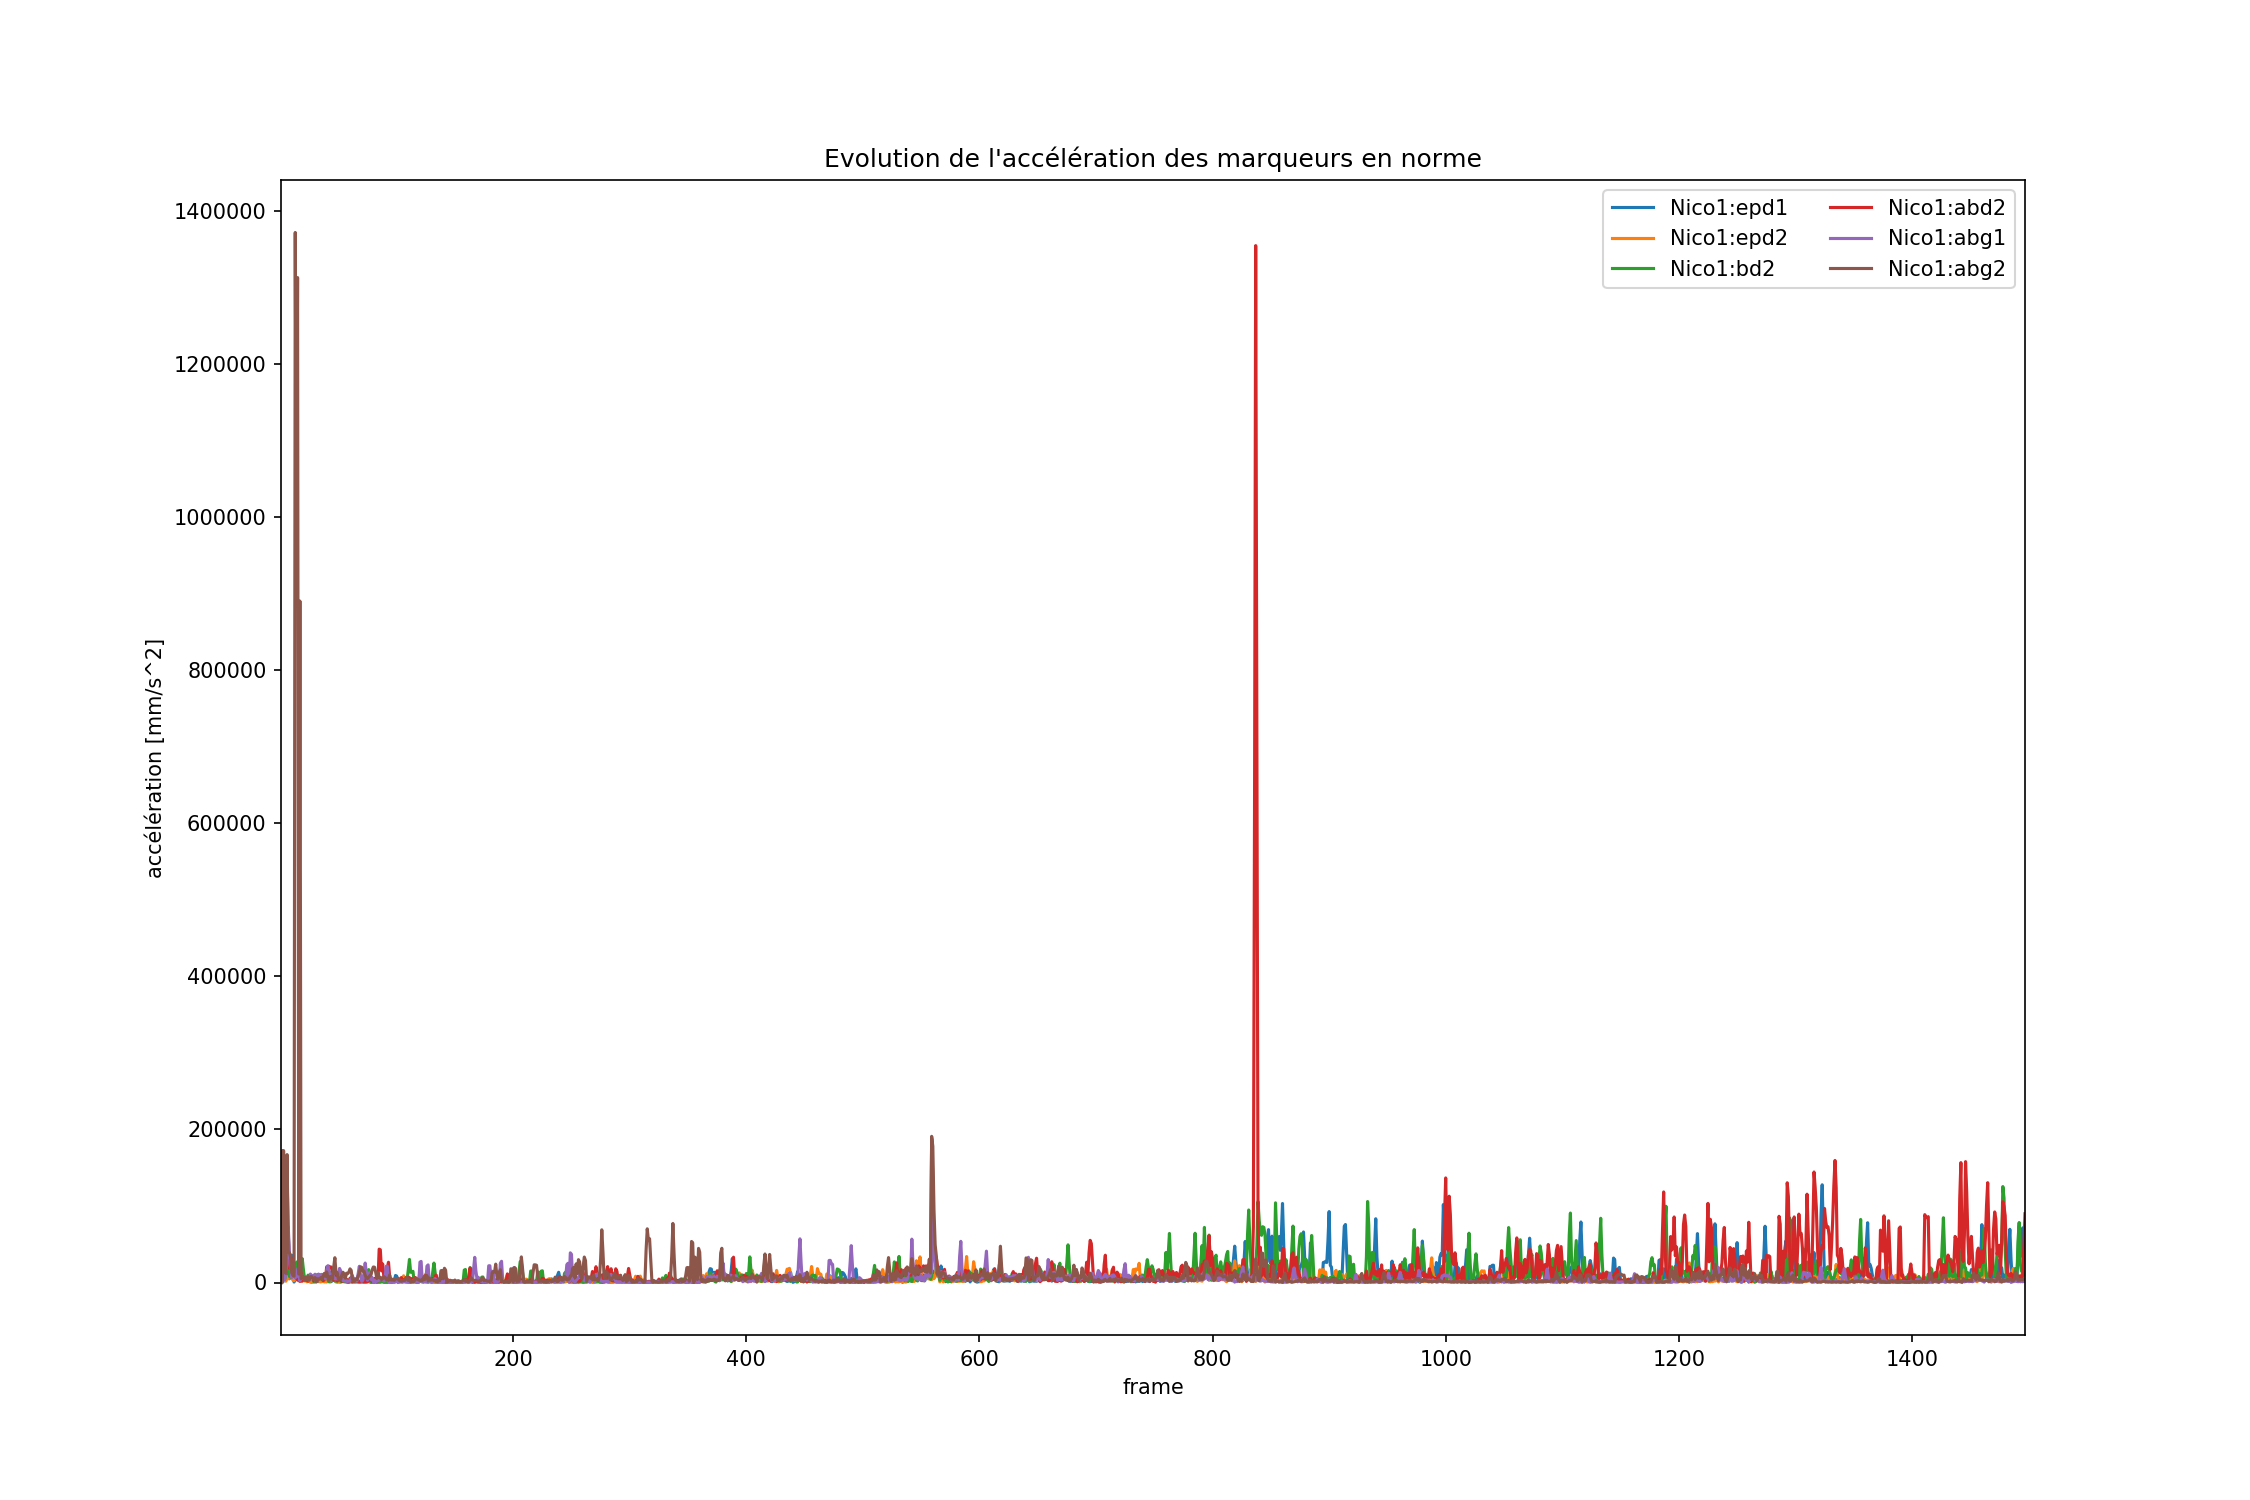

In [32]:
%matplotlib inline
dataframe_plot(mocap_acc,ylabel='accélération [mm/s^2]',title="Evolution de l'accélération des marqueurs en norme")

# Tracking OpenPose

Sur le github d'OpenPose, on trouve à quoi corresponde les coordonnées présentes dans le json [link](https://github.com/CMU-Perceptual-Computing-Lab/openpose/blob/master/doc/output.md). Il existe deux configurations Body_25 et COCO données par les images ci-dessous. 

<table>
		<tr>
			<td><img src="img\keypoints_pose_25.png", width="480"></td>
			<td><img src="img\keypoints_pose_18.png", width="480"></td>
		</tr>
</table>

Dans le cas "Body_25" les parties du corps sont les suivantes (pour COCO il suffit d'identifier les numéros communs avec Body_25) : 

In [13]:
# Resultat pour BODY_25 (25 parties du corps composées de COCO + pied)
#     {0,  "Nose"},
#     {1,  "Neck"},
#     {2,  "RShoulder"},
#     {3,  "RElbow"},
#     {4,  "RWrist"},
#     {5,  "LShoulder"},
#     {6,  "LElbow"},
#     {7,  "LWrist"},
#     {8,  "MidHip"},
#     {9,  "RHip"},
#     {10, "RKnee"},
#     {11, "RAnkle"},
#     {12, "LHip"},
#     {13, "LKnee"},
#     {14, "LAnkle"},
#     {15, "REye"},
#     {16, "LEye"},
#     {17, "REar"},
#     {18, "LEar"},
#     {19, "LBigToe"},
#     {20, "LSmallToe"},
#     {21, "LHeel"},
#     {22, "RBigToe"},
#     {23, "RSmallToe"},
#     {24, "RHeel"},
#     {25, "Background"}

## Récupération des données

In [18]:
import json
import os

def get_openpose_data(model):
    "model should be BODY_25 or COCO"
    os.chdir(r"C:\Users\ReViVD\Desktop\MultiAcqui\211019_NicoGabin_carre\OpenPose_skellington_capture\brutes")

    data=[]
    for jsonfile in os.listdir():
        if 'json' in jsonfile:
            with open(jsonfile) as j:
                people=json.loads(j.read())['people'][0]['pose_keypoints_2d']
                data.append(people)
    
    if model=='BODY_25':    
        iterables=[["Nose","Neck","RShoulder","RElbow","RWrist","LShoulder","LElbow","LWrist","MidHip","RHip","RKnee","RAnkle","LHip","LKnee","LAnkle","REye","LEye","REar","LEar","LBigToe","LSmallToe","LHeel","RBigToe","RSmallToe","RHeel","Background"],['x','y','c']]
    if model=='COCO':
        iterables=[["Nose","Neck","RShoulder","RElbow","RWrist","LShoulder","LElbow","LWrist","RHip","RKnee","RAnkle","LHip","LKnee","LAnkle","REye","LEye","REar","LEar"],['x','y','c']]
    columns=pd.MultiIndex.from_product(iterables, names=['first', 'second'])
    data=pd.DataFrame(data, columns=columns)

    os.chdir(r"C:\Users\ReViVD\Desktop\MultiAcqui\211019_NicoGabin_carre")
    return(data)

op_data=get_openpose_data('COCO')

In [19]:
op_data.head(10)

first      Nose                        Neck                    RShoulder  \
second        x        y         c        x        y         c         x   
0       860.042  412.618  0.448002  918.783  471.390  0.731785   930.653   
1       860.044  412.579  0.444097  918.768  471.431  0.738546   930.657   
2       860.037  412.587  0.435449  918.797  471.418  0.739221   930.676   
3       860.030  412.585  0.426685  918.787  471.413  0.736477   930.659   
4       860.032  412.585  0.444124  918.787  471.410  0.736323   930.664   
5       860.037  412.578  0.436364  918.772  471.416  0.735953   930.650   
6       860.036  412.585  0.419157  918.765  471.409  0.735459   930.637   
7       860.037  412.573  0.388632  918.768  471.419  0.738599   930.648   
8       860.034  412.594  0.359602  918.772  471.438  0.741690   930.672   
9       860.052  412.594  0.339810  918.775  471.425  0.743335   930.673   

first                       RElbow  ... REye     LEye                     \
second        y         c        x  ...    c        x        y         c   
0       465.599  0.724622  924.626  ...  0.0  862.861  403.762  0.531664   
1       468.437  0.726488  921.743  ...  0.0  862.874  403.718  0.522167   
2       465.600  0.725938  921.735  ...  0.0  862.865  403.723  0.512956   
3       465.594  0.726915  924.543  ...  0.0  862.862  403.717  0.505367   
4       465.598  0.725548  924.536  ...  0.0  862.870  403.728  0.521213   
5       465.605  0.725731  924.542  ...  0.0  862.873  403.707  0.511349   
6       465.594  0.726233  924.532  ...  0.0  862.863  403.716  0.498386   
7       465.602  0.727744  924.550  ...  0.0  862.857  403.706  0.471602   
8       468.426  0.728404  924.585  ...  0.0  862.846  403.716  0.445733   
9       465.603  0.729440  924.542  ...  0.0  862.856  403.724  0.431409   

first      REar                        LEar                     
second        x        y         c        x        y         c  
0       924.601  409.658  0.055200  883.362  406.607  0.938269  
1       924.592  409.675  0.056653  883.371  406.590  0.935910  
2       924.601  409.653  0.057283  883.359  406.579  0.933608  
3       924.582  409.635  0.061108  883.344  406.579  0.932502  
4       924.620  409.652  0.058610  883.357  406.599  0.937572  
5       924.610  409.647  0.060049  883.355  406.574  0.934714  
6       924.592  409.649  0.062725  883.343  406.576  0.935824  
7       924.556  409.641  0.069531  880.651  406.567  0.933179  
8       921.797  409.584  0.075649  880.625  406.549  0.928079  
9       921.775  409.586  0.077632  880.625  406.559  0.930273  

[10 rows x 54 columns]

## Tracés de la position
### Evolution des coordonnées

Notons que les coordonnées renvoyées par OpenPose sont calculées pour une origine placée en haut à gauche de l'écran.

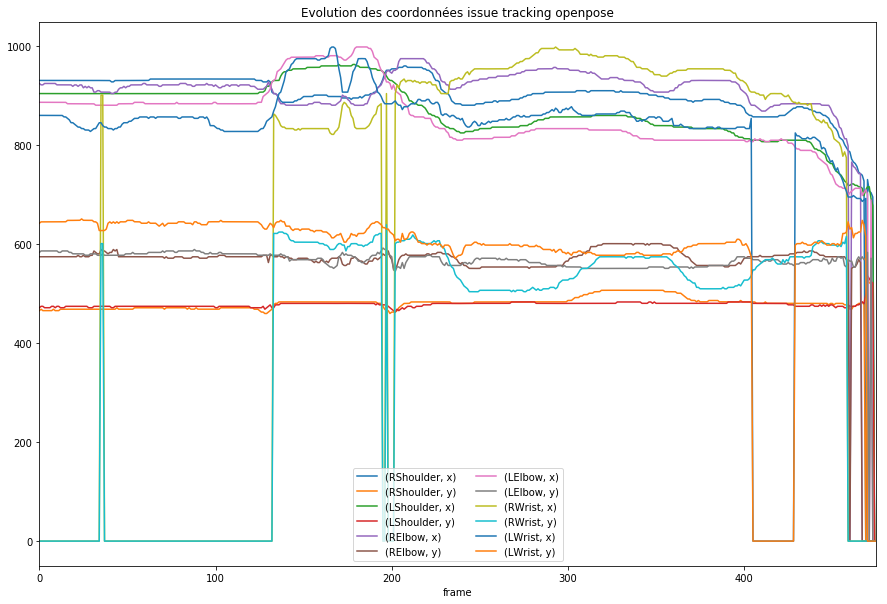

In [69]:
%matplotlib inline
mocap_segments=['RShoulder','LShoulder',"RElbow","LElbow","RWrist","LWrist"] #only same parts as MoCap

op_data = op_data.sort_index(axis=1)
op_data_without_c=op_data.loc[:,(slice(None),('x','y'))].copy() #we don't want to plot c 

dataframe_plot(op_data_without_c,title='Evolution des coordonnées issue tracking openpose',segments=mocap_segments)

### Animation 2D 

Traceback (most recent call last):
  File "C:\Users\ReViVD\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 215, in process
    func(*args, **kwargs)
  File "C:\Users\ReViVD\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


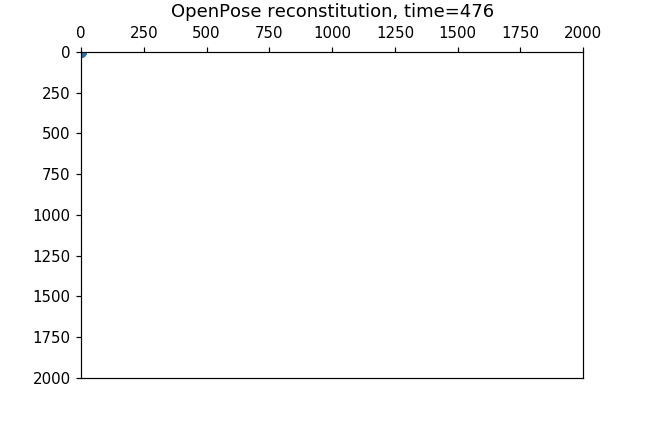

In [79]:
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt

segments=["LWrist","LElbow",'LShoulder','RShoulder',"RElbow","RWrist"]
def update_graph(num):
    X,Y=[],[]
    for seg in segments:
        data=op_data2[seg].iloc[num]
        X.append(data.x)
        Y.append(data.y)
    graph.set_data(X, Y)
    title.set_text('OpenPose reconstitution, time={}'.format(num))
    return title, graph, 


fig = plt.figure()
ax = fig.add_subplot(111)
title = ax.set_title('OpenPose reconstitution')
#ax.xlim=(df['Nico1:abd2']['X'].min(),df['Nico1:abd2']['X'].max())

X,Y=[],[]
num=0
for seg in segments:
    data=op_data2[seg].iloc[num]
    X.append(data.x)
    Y.append(data.y)
graph, = ax.plot(X, Y, linestyle="-", marker="o")

ani = animation.FuncAnimation(fig, update_graph, 
                               interval=40, blit=True, repeat=False, save_count=len(op_data2))

ax.set_xlim(0,2000)
ax.set_ylim(0,2000)

#origine en haut à gauche de l'écran
ax.set_ylim(ax.get_ylim()[::-1])
ax.yaxis.tick_left()
ax.xaxis.tick_top() 

#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=25, metadata=dict(artist='Me'), bitrate=1800)
#ani.save('videos/OpenPose_animation.mp4', writer=writer)
plt.show()


Pour chaque keypoint, on a les valeurs de position x,y et la valeur de confiance c comprise entre 0 et 1. On remarque que certaines valeurs de x,y sont 0 : il s'agit des instants où le point n'est pas détecté par OpenPose.

## Evolution de la vitesse
### Série temporelle

In [90]:
op_coord_v=derivee(op_data_without_c,25)
op_v=norm_dataframe(op_coord_v)

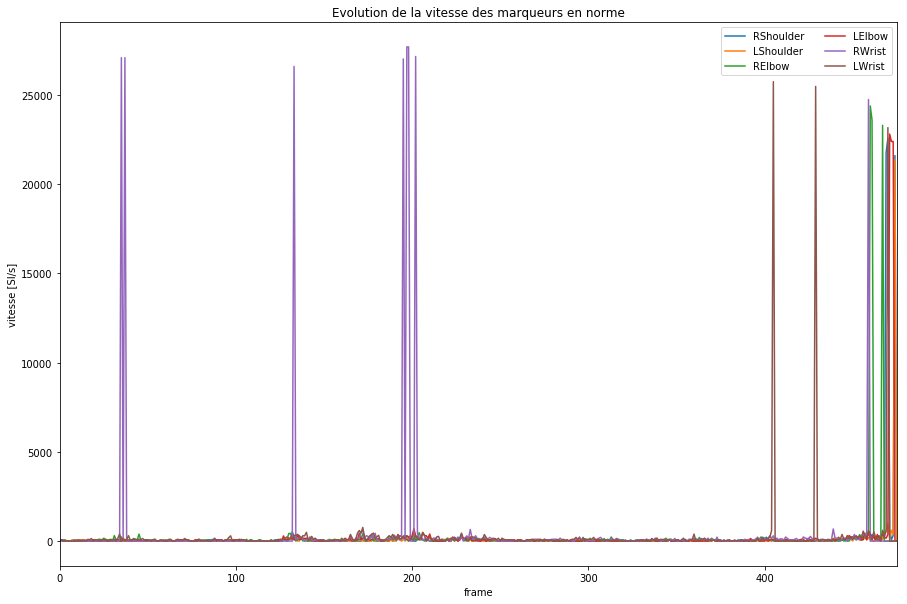

In [93]:
%matplotlib inline
dataframe_plot(op_v,ylabel='vitesse [SI/s]',title='Evolution de la vitesse des marqueurs en norme',segments=mocap_segments)

## Evolution de l'accélération
### Série temporelle

In [92]:
op_coord_acc=derivee(op_coord_v,25)
op_acc=norm_dataframe(op_coord_acc)

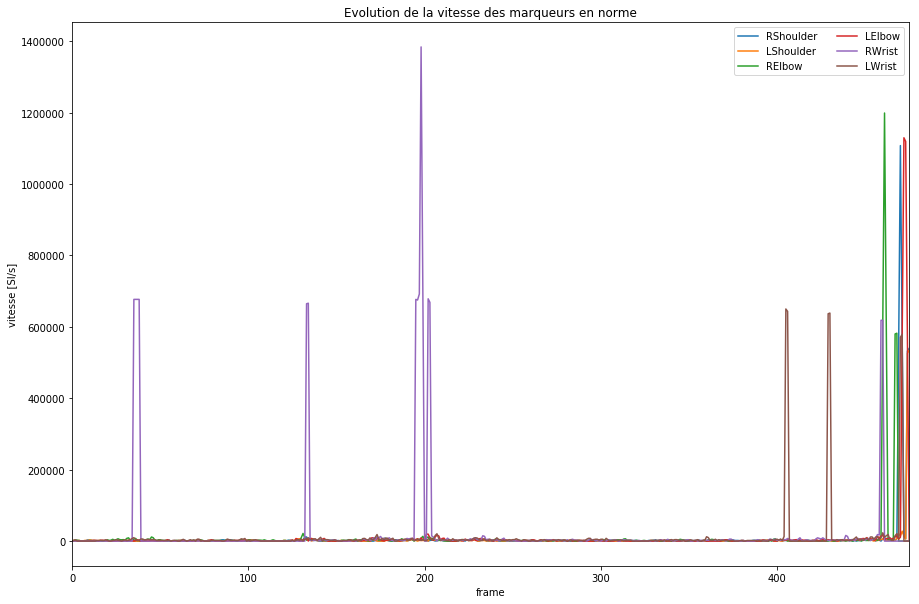

In [94]:
%matplotlib inline
dataframe_plot(op_acc,ylabel='vitesse [SI/s]',title='Evolution de la vitesse des marqueurs en norme',segments=mocap_segments)

# Comparaison

### Projection 2D 

Pour passer d'un repère 3D à un repère 2D on a besoin de 8 valeurs de projection :
* (xx, xy, xz) : pour convertir un point en ordinnées
* (yx, yy, yz) : pour convertir un point en abscices
* (ox, oy) : les offsets entre les origines

Si (X, Y, Z) sont nos coordonnées 3D d'origine, alors on obtien les coordonnées projetées (X2d, Y2d) par :

X2d = X*xx + Y*xy + Z*xz + ox

Y2d = X*yx + Y*yy + Z*yz + oy

Avec un peu de ML on trouve ([lien](https://github.com/AmigoCap/MultiAcqui/tree/master/3Dto2D_conversion)) :

**Projection Matrix** : 
$
\begin{matrix} 
0.05241897 & -0.13417533 & -0.00497104 \\
-0.00236236 &  0.00797051 & -0.25118345
\end{matrix}
$

**Offset Matrix** : 
$
\begin{matrix} 
1031.45356893 \\
855.62283821
\end{matrix}
$


In [120]:
x_proj=np.array([0.05241897,-0.13417533,-0.00497104])
y_proj=np.array([-0.00236236,0.00797051,-0.25118345])
offset=[1031.45356893,855.62283821]

def projection(row,header,proj,offset):
    return (np.array(row[header])*proj+offset)

def projection_mocap_2D(df):
    headers=df.columns.get_level_values(level=0).unique()
    df2=df.loc[:,(slice(None),('X','Y'))].copy()
    for header in headers:
        for abscisse in ['X','Y']:
            if abscisse=='X':
                df2.loc[:,(header,'X')]=df.apply(projection,header=header,proj=x_proj,offset=offset[0],axis=1)
            else :
                df2.loc[:,(header,'Y')]=df.apply(projection,header=header,proj=y_proj,offset=offset[1],axis=1)
                
    return(df2)

mocap_data_2D=projection_mocap_2D(mocap_data)

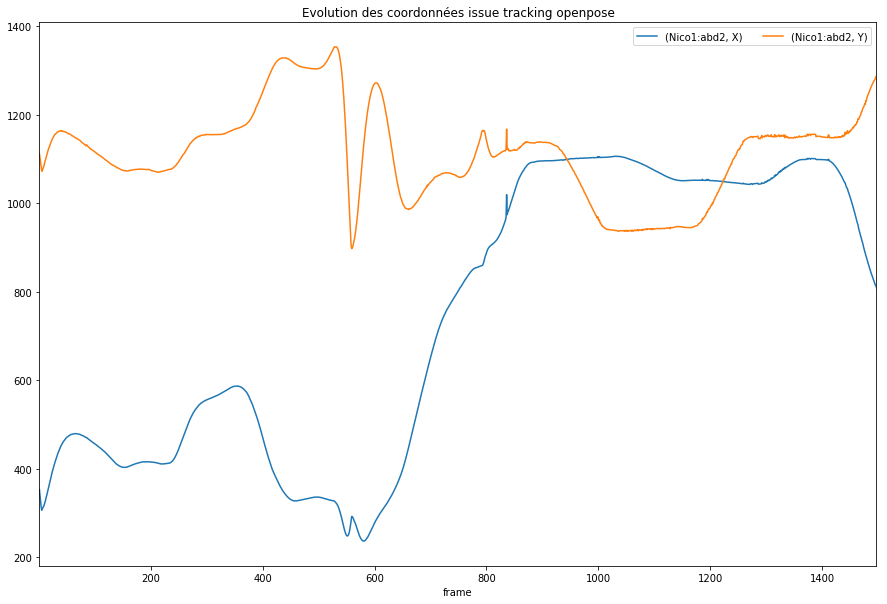

In [114]:
dataframe_plot(mocap_data_2D,title='Evolution des coordonnées issue tracking openpose',segments=['Nico1:abd2'])

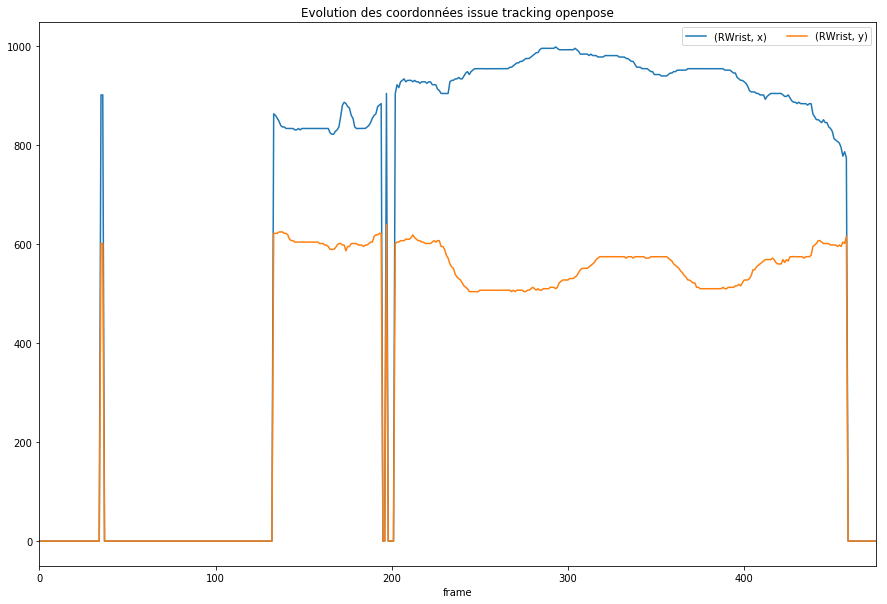

In [106]:
dataframe_plot(op_data_without_c,title='Evolution des coordonnées issue tracking openpose',segments=['RWrist'])

In [117]:
op_data_without_c['RWrist']

second,x,y
0,0.000,0.000
1,0.000,0.000
2,0.000,0.000
3,0.000,0.000
4,0.000,0.000
5,0.000,0.000
6,0.000,0.000
7,0.000,0.000
8,0.000,0.000
9,0.000,0.000


In [121]:
mocap_data_2D.head(10)

Nico1:epd1  \
Frame                                                  X   
1      [1059.1883411190602, 900.9304914126001, 1023.9...   
2      [1059.10384173942, 900.7610279708101, 1023.961...   
3      [1059.01294724544, 900.6071288673, 1023.962360...   
4      [1058.91335120244, 900.67193555169, 1023.96638...   
5      [1058.8460452449601, 900.52970970189, 1023.966...   
6      [1058.79205370586, 900.36212471472, 1023.96380...   
7      [1058.7556749406801, 900.2636400225001, 1023.9...   
8      [1058.73434041989, 900.21117746847, 1023.95391...   
9      [1058.78162233083, 899.9436318604501, 1023.946...   
10     [1058.79802946844, 900.09390823005, 1023.94685...   

                                                          \
Frame                                                  Y   
1      [854.37291825872, 863.3763909278, 477.00648852...   
2      [854.37672638304, 863.3864576819301, 477.05170...   
3      [854.38082271528, 863.3955998569, 477.09691456...   
4      [854.3853111992801, 863.3917501005701, 477.300...   
5      [854.38834446952, 863.4001988411701, 477.28530...   
6      [854.3907777003201, 863.41015400816, 477.16975...   
7      [854.39241717816, 863.4160043625001, 476.94369...   
8      [854.39337865868, 863.41912083191, 476.6699026...   
9      [854.3912478099601, 863.4350140288501, 476.283...   
10     [854.39050839128, 863.4260870576501, 476.31322...   

                                              Nico1:epd2  \
Frame                                                  X   
1      [1039.01820290967, 925.78029922992, 1023.99283...   
2      [1039.06186791168, 925.5114118686, 1023.994175...   
3      [1039.09578298527, 925.3302751731001, 1023.994...   
4      [1039.12539970332, 925.1893910766, 1023.993429...   
5      [1039.1504559709801, 925.0585701298501, 1023.9...   
6      [1039.1538107850602, 924.93271367031, 1023.987...   
7      [1039.16953647606, 924.8103457693501, 1023.981...   
8      [1039.18347992208, 924.74607578628, 1023.97677...   
9      [1039.1855242619101, 924.75426048141, 1023.974...   
10     [1039.17315338499, 924.8220190230601, 1023.974...   

                                                          \
Frame                                                  Y   
1      [855.28192367604, 861.9002205937601, 478.63666...   
2      [855.27995583016, 861.9161934958, 478.70448864...   
3      [855.27842738324, 861.9269536843001, 478.69946...   
4      [855.27709264984, 861.9353227198001, 478.66681...   
5      [855.27596344176, 861.94309396705, 478.6040152...   
6      [855.27581225072, 861.95057030543, 478.3804619...   
7      [855.2751035427201, 861.95783941055, 478.04889...   
8      [855.2744751549601, 861.96165728484, 477.82534...   
9      [855.27438302292, 861.96117108373, 477.7072903...   
10     [855.27494053988, 861.9571459761801, 477.68970...   

                                               Nico1:bd2  \
Frame                                                  X   
1      [1061.50405395675, 896.2356966159, 1025.594999...   
2      [1061.2154875269, 895.8814737447001, 1025.5975...   
3      [1060.9208929155, 895.4413786623, 1025.5985785...   
4      [1060.6067984472602, 895.0254351393, 1025.5995...   
5      [1060.2995184451202, 894.7705020123001, 1025.6...   
6      [1060.07422171206, 894.7785525321001, 1025.599...   
7      [1060.19237407044, 895.0616624784001, 1025.596...   
8      [1060.34318344713, 895.3702657374001, 1025.591...   
9      [1060.47066638217, 895.6198318512, 1025.586896...   
10     [1060.6577496861, 895.6480086705001, 1025.5828...   

                                                          \
Frame                                                  Y   
1      [854.2685562810001, 863.6552790727001, 559.593...   
2      [854.2815610728001, 863.6763212191, 559.723710...   
3      [854.294837536, 863.7024644919001, 559.7739471...   
4      [854.30899279712, 863.7271730729001, 559.82418...   
5      [854.3228409514401, 863.7423170419, 559.909586...   
6      [854.332994374

In [119]:
mocap_data.head(10)

Nico1:epd1                   Nico1:epd2                   Nico1:bd2  \
Frame          X        Y        Z          X        Y        Z         X   
1        529.098  972.780  1507.33    144.311  787.576  1500.84   573.275   
2        527.486  974.043  1507.15    145.144  789.580  1500.57   567.770   
3        525.752  975.190  1506.97    145.791  790.930  1500.59   562.150   
4        523.852  974.707  1506.16    146.356  791.980  1500.72   556.158   
5        522.568  975.767  1506.22    146.834  792.955  1500.97   550.296   
6        521.538  977.016  1506.68    146.898  793.893  1501.86   545.998   
7        520.844  977.750  1507.58    147.198  794.805  1503.18   548.252   
8        520.437  978.141  1508.67    147.464  795.284  1504.07   551.129   
9        521.339  980.135  1510.21    147.503  795.223  1504.54   553.561   
10       521.652  979.015  1510.09    147.267  794.718  1504.61   557.130   

                        Nico1:abd2                   Nico1:abg1           \
Frame        Y        Z          X        Y        Z          X        Y   
1      1007.77  1178.54    352.540  1112.06  1023.32    97.5390  798.087   
2      1010.41  1178.02    338.958  1101.91  1026.39    99.7181  804.519   
3      1013.69  1177.82    325.751  1090.98  1029.93   102.0110  811.357   
4      1016.79  1177.62    314.334  1082.52  1034.94   104.1440  817.909   
5      1018.69  1177.28    306.045  1073.06  1039.36   106.8810  823.417   
6      1018.63  1177.55    308.810  1072.31  1041.79   108.9690  826.772   
7      1016.52  1178.19    311.420  1077.72  1042.37   110.0420  823.639   
8      1014.22  1179.31    314.051  1081.29  1043.31   109.6260  818.738   
9      1012.36  1180.17    316.406  1084.33  1041.63   108.6000  816.440   
10     1012.15  1180.98    320.281  1090.03  1040.92   107.3130  813.561   

               Nico1:abg2                    
Frame        Z          X        Y        Z  
1      1169.13        NaN      NaN      NaN  
2      1169.34    175.084  1025.27  1020.57  
3      1169.79    190.938  1030.28  1025.07  
4      1170.45    204.470  1033.86  1029.33  
5      1171.54    218.538  1036.40  1033.45  
6      1173.43    215.999  1037.19  1037.18  
7      1172.24    211.016  1039.43  1038.18  
8      1174.16    207.412  1038.12  1038.25  
9      1174.54    201.554  1039.04  1038.91  
10     1174.94    194.926  1039.74  1038.56

# Synchronisation

## Synchronisation temporelle
De manière visuelle, sur les graphiques précédents, il semblerait que la frame du clap soit 172 pour la vidéo et 557 pour le Mocap

<IPython.core.display.Javascript object>


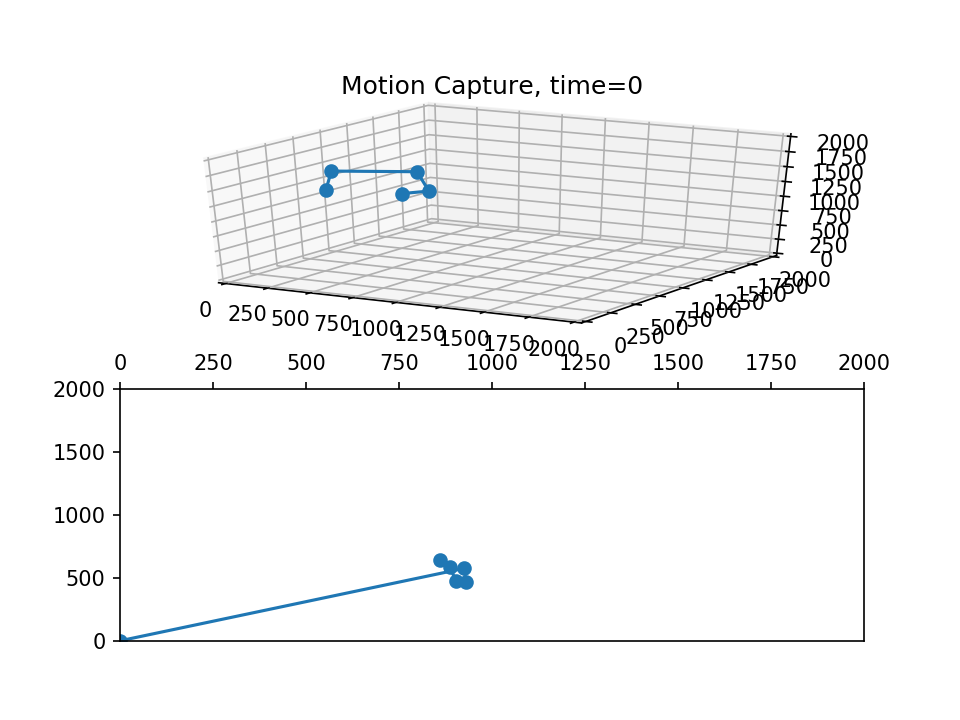

In [101]:
segments=['Nico1:abd2','Nico1:bd2','Nico1:epd1','Nico1:epd2','Nico1:abg1','Nico1:abg2']
segments2=["LWrist","LElbow",'LShoulder','RShoulder',"RElbow","RWrist"]

#def anim(segments,df):
#xdata1,ydata1,zdata1=[]
#xdata2,ydata2,zdata2=[]
def update_graph(num):
    X,Y,Z=[],[],[]
    for seg in segments:
        data=mocap_data[seg].iloc[num]
        X.append(data.X)
        Y.append(data.Y)
        Z.append(data.Z)
    graph1.set_data(X, Y)
    graph1.set_3d_properties(Z)
    title1.set_text('Motion Capture, time={}'.format(num))
    X,Y=[],[]
    
    for seg in segments2:
        data=op_data2[seg].iloc[num]
        X.append(data.x)
        Y.append(data.y)
    graph2.set_data(X, Y)
    title2.set_text('OpenPose reconstitution, time={}'.format(num))

    return graph1, graph2


fig = plt.figure()
ax1 = fig.add_subplot(211, projection='3d')
ax2 = fig.add_subplot(212)
title1 = ax1.set_title('Motion Capture')
#ax.xlim=(df['Nico1:abd2']['X'].min(),df['Nico1:abd2']['X'].max())

X1,Y1,Z1=[],[],[]
num1=557
for seg in segments:
    data=mocap_data[seg].iloc[num1]
    X1.append(data.X)
    Y1.append(data.Y)
    Z1.append(data.Z)
    
num2=172
X2,Y2=[],[]
for seg in segments2:
    data=op_data[seg].iloc[num2]
    X2.append(data.x)
    Y2.append(data.y)

graph1, = ax1.plot(X1, Y1, Z1, linestyle="-", marker="o")
graph2, = ax2.plot(X2, Y2, linestyle="-", marker="o")

ani = animation.FuncAnimation(fig, update_graph,
                               interval=10, blit=True, repeat=False)

ax1.set_xlim(0,2000)
ax1.set_ylim(0,2000)
ax1.set_zlim(0,2000)
ax2.set_xlim(0,2000)
ax2.set_ylim(0,2000)
ax2.set_ylim(ax.get_ylim()[::-1])
ax2.yaxis.tick_left()
ax2.xaxis.tick_top()
#plt.xlim(df['Nico1:abd2']['X'].min(),df['Nico1:abd2']['X'].max())  
#plt.ylim(df['Nico1:abd2']['Y'].min(),df['Nico1:abd2']['Y'].max())
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)
#ani.save('MoCap_animation.mp4', writer=writer)
plt.show()

<IPython.core.display.Javascript object>


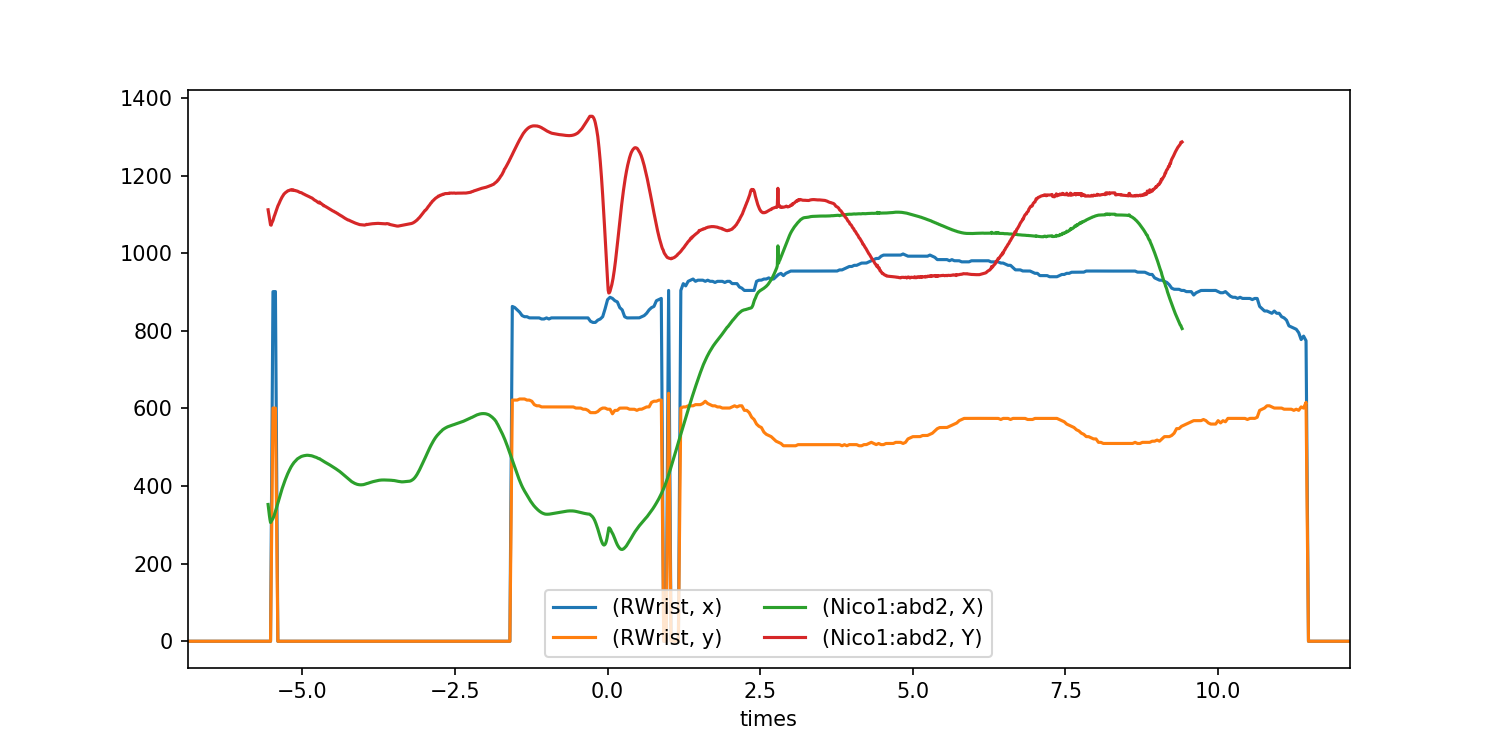

C:\Users\ReViVD\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ReViVD\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [117]:
fig, ax = plt.subplots()
op_data2['times']=op_data2.index
op_data2['times']=(op_data2['times']-172)/25
op_data2.plot(x='times',y=[('RWrist','x'),('RWrist','y')],figsize=(10,5),ax=ax)

mocap_data['times']=mocap_data.index
mocap_data['times']=(mocap_data['times']-557)/100
mocap_data.plot(x='times',y=[('Nico1:abd2','X'),('Nico1:abd2','Y')],figsize=(10,5),ax=ax)

ax.legend(ncol=2)

In [98]:
np.transpose(np.array([1,2]))

array([1, 2])

In [100]:
np.array([1,2])*np.array([1,2])

array([1, 4])